## What Is a Time Series?
A time series is a sequence of data points dependent on time. That means that each data point has a timestamp assigned to it. Ideally, these data points are measured at constant intervals (e.g., every day) and in chronological order (e.g., Monday, Tuesday, Wednesday, etc.).


Time series are usually numerical values, e.g., sales data, but they can also be categorical, e.g., event data. Time series data usually comes in tabular format (e.g., CSV files) with a column for the timestamps and at least one for the time series values.

## What is Time Series Analysis:
Time series analysis is similar to Exploratory Data Analysis (EDA) in the Data Science workflow because it analyzes relationships among variables and outliers. Additionally, we want to find long-term trends or short-term repeating patterns

## What Is Time Series Forecasting?
In time series forecasting, we try to predict how a sequence of observations will continue in the future. For this purpose, we first analyze historical data similar to time series analysis. Then we fit a model to the historical data to make our predictions.

Time series forecasting has a wide variety of problem settings. They can differ in the following aspects:
number of observed time series to predict (univariate vs. multivariate)

prediction time frame (short-term vs. long-term)



Time series using

In [ ]:
!pip install scalecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 53.9 MB/s eta 0:00:00
  Created wheel for scalecast: filename=SCALECAST-0.19.1-py3-none-any.whl size=121096 sha256=69984abfd0870f359cc1e29588cea706a1136f11580cdf46448b0f4e708c2695
  Stored in directory: /root/.cache/pip/wheels/9b/a5/2f/dcb3d1843988f591e77fc216c31e9ad6d04223f5a2efdb90a6
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107719 sha256=0ffd3b744fd775d4f2a72cbb4e0e5f4dd7f5b6f51220b810ccb39de06cbfa640
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0

In [ ]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

In [ ]:
# Download the "Air Passengers.csv" using the link "https://www.kaggle.com/datasets/rakannimer/air-passengers?resource=download"
#Once this is downloaded, unzip it and you will find the csv file


In [ ]:
# upload the csv file to the google colab from your local computer which you obtained from the above step
from google.colab import files
uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers.csv


In [ ]:
df = pd.read_csv('AirPassengers.csv',parse_dates=['Month'])

In [ ]:
df.head()

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


This set captures 12 years of monthly air passenger data for an airline. It starts in January 1949 and ends December of 1960. It is a good example dataset for forecasting because it has a clear trend and seasonal patterns.

## Exploratory Data Analysis
To begin forecasting with scalecast, we must first call the Forecaster object with the y and current_dates parameters specified, like so:

In [ ]:
# Convert the 'Month' column to a datetime format and set it as the index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Display the updated DataFrame
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


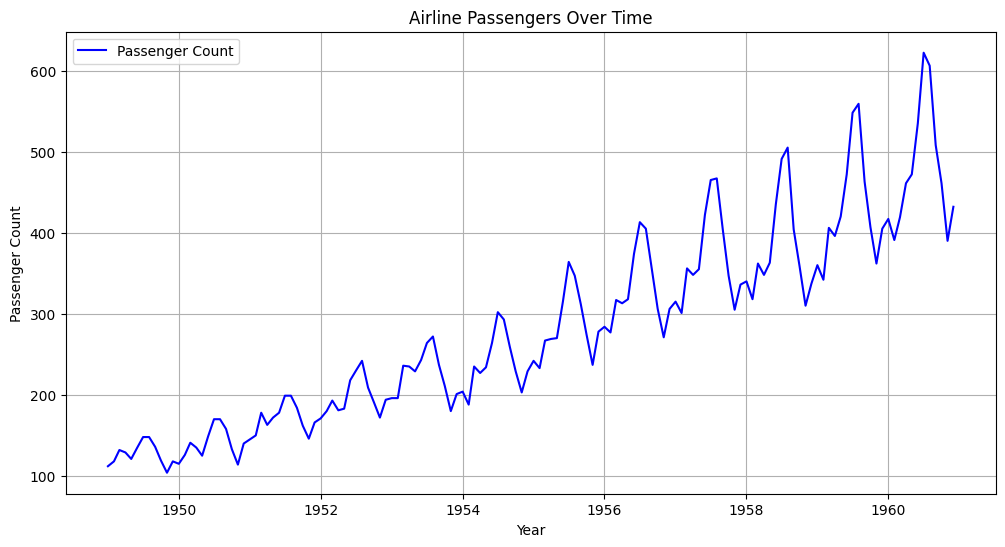

In [ ]:
#To visualize the trend and seasonality, you can create a line plot of the time series data
# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['#Passengers'], label='Passenger Count', color='blue')
plt.title('Airline Passengers Over Time')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.legend()
plt.grid(True)
plt.show()


## Applying LSTM
Before applying LSTM, you need to prepare the data. This includes splitting the dataset into training and testing sets and scaling the data to ensure it falls within a similar range.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Extract the passenger count values
data = df['#Passengers'].values.reshape(-1, 1)

# Normalize the data (scaling)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Split the data into training and testing sets
train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]


## Create Sequences:

LSTM requires sequences of data as input. You'll create sequences of a specified length from the training data.


assumption:
OR
observation:

current time slice t

dependency: t on t-1, t-2,.....

In [ ]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequence = data[i:i + seq_length]
        sequences.append(sequence)
    return sequences

seq_length = 12  # You can adjust this sequence length
train_sequences = create_sequences(train_data, seq_length)


### Convert to Numpy Arrays:
Convert the sequences to Numpy arrays, which can be used as input to the LSTM model.


1,2,3,4,5,6,7,8,9,10

t-4,t-3,t-2,t-1, t

x1, x2, x3, x4,  y

1,2,3,4,5

2,3,4,5,6

3,4,5,6,7

4,5,6,7,8

In [ ]:
import numpy as np

train_X = np.array([sequence[:-1] for sequence in train_sequences])
train_y = np.array([sequence[-1] for sequence in train_sequences])


## Build and Train LSTM Model:
Create an LSTM model using Keras and train it on the training data.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length - 1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(train_X, train_y, epochs=100, batch_size=16)


Epoch 1/100
7/7 [==============================] - 2s 10ms/step - loss: 0.1111
Epoch 2/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0732
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0471
Epoch 4/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0228
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 0.0121
Epoch 6/100
7/7 [==============================] - 0s 11ms/step - loss: 0.0132
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0103
Epoch 8/100
7/7 [==============================] - 0s 7ms/step - loss: 0.0098
Epoch 9/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0089
Epoch 10/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0081
Epoch 11/100
7/7 [==============================] - 0s 10ms/step - loss: 0.0074
Epoch 12/100
7/7 [==============================] - 0s 8ms/step - loss: 0.0069
Epoch 13/100
7/7 [==============================] - 0s 8m

## Predictions:
Use the trained LSTM model to make predictions on the test data.

In [ ]:
# Prepare test data
test_sequences = create_sequences(test_data, seq_length)
test_X = np.array([sequence[:-1] for sequence in test_sequences])
test_y = np.array([sequence[-1] for sequence in test_sequences])

# Make predictions
predictions = model.predict(test_X)
predictions = scaler.inverse_transform(predictions)  # Inverse scaling


1/1 [==============================] - 0s 408ms/step


## Plot the Predictions:
Visualize the predicted values alongside the actual values to evaluate the model's performance.

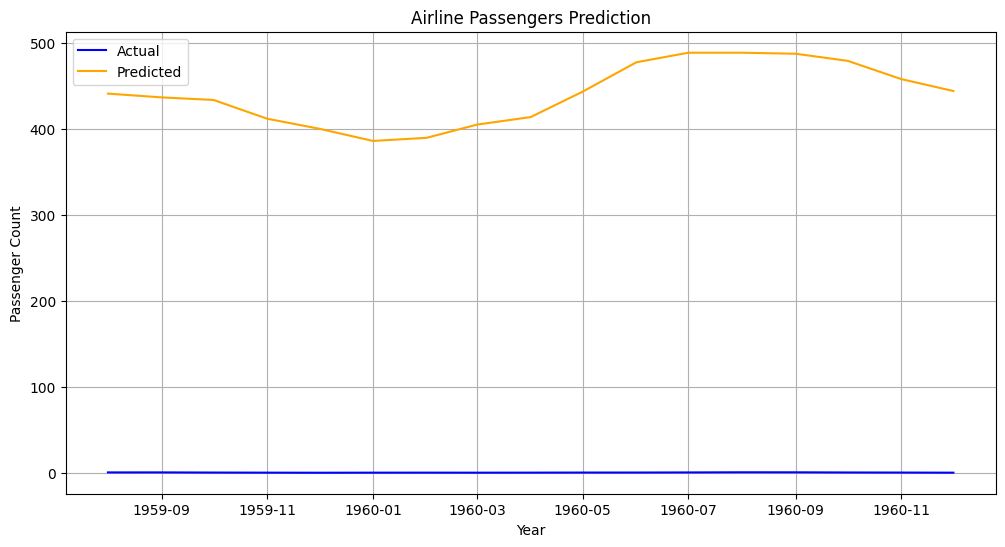

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[train_size + seq_length:], test_y, label='Actual', color='blue')
plt.plot(df.index[train_size + seq_length:], predictions, label='Predicted', color='orange')
plt.title('Airline Passengers Prediction')
plt.xlabel('Year')
plt.ylabel('Passenger Count')
plt.legend()
plt.grid(True)
plt.show()


This code provides a basic example of applying LSTM for time series forecasting on the "airpassengers.csv" dataset. You can further fine-tune the model and parameters for better performance. Additionally, hyperparameter tuning and more advanced techniques can be applied to improve the accuracy of predictions.